1. Setup and Get Data

In [ ]:
import os 
import time 
import uuid
import cv2 as cv

Collect Images Using OpenCV

In [5]:
IMAGES_PATH=os.path.join('data','images')
number_images=30

In [6]:
for image_num in range(30):
    print(image_num)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [7]:
!labelme

2024-09-29 04:08:59,779 [INFO   ] __init__:get_config:67- Loading config file from: /Users/Lenovo/.labelmerc


In [30]:
cap =cv.VideoCapture(0)
for imgnum in range(number_images):
    print("Collecting image{}".format(imgnum))
    ret,frame=cap.read()
    imgname=os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv.imwrite(imgname,frame)
    cv.imshow('frame',frame)
    time.sleep(1.0)

    if cv.waitKey(1) & 0xFF==ord('q'):
        break

cap.release()
cv.destroyAllWindows()

KeyboardInterrupt: 


Annotate Images with LabelMe


In [ ]:
!labelme

2. Review Dataset and Build Image Loading Function

Import TF and Deps

In [31]:
import tensorflow as tf
import cv2 as cv
import json
import numpy as np
import matplotlib.pyplot as plt


Limit GPU Memory Growth

In [32]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [33]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [34]:
%pip install tensorflow-macos



  Using cached tensorflow-2.16.2-cp39-cp39-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow-2.16.2-cp39-cp39-macosx_12_0_arm64.whl (227.0 MB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
Note: you may need to restart the kernel to use updated packages.


In [35]:
%pip install tensorflow-metal



Note: you may need to restart the kernel to use updated packages.


In [36]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [37]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [38]:
pip show tensorflow-macos


Name: tensorflow-macos
Version: 2.16.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/anaconda3/lib/python3.9/site-packages
Requires: tensorflow
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install --upgrade tensorflow


  Using cached tensorflow-2.17.0-cp39-cp39-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow-2.17.0-cp39-cp39-macosx_12_0_arm64.whl (236.1 MB)
Using cached tensorboard-2.17.1-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.2
    Uninstalling tensorflow-2.16.2:
      Successfully uninstalled tensorflow-2.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.16.2 requires tensorflow==2.16.2; platform_system == "Darwin" and platform_machine == "arm64", but you have tensorflow 2.17.0 which is incompatible.
Note: you may need to resta

In [40]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


 Load Image into TF Data Pipeline

In [41]:
images=tf.data.Dataset.list_files('Desktop/DATA/images/*.jpg',shuffle=True)


InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: Desktop/DATA/images/*.jpg'

In [ ]:
images.as_numpy_iterator().next()

In [ ]:
def load_image(x):
    byte_img=tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
images=images.map(load_image)

In [ ]:
images.as_numpy_iterator().next()

In [ ]:
type(images)

View Raw Images with Matplotlib

In [ ]:
image_generator=images.batch(4).as_numpy_iterator()


In [ ]:
plot_images=image_generator.next()


In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(30,20))
for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)

plt.imshow()

3. Partition Unaugmented Data

MANUALLY SPLIT DATA INTO TRAIN TEST AND VAL

In [ ]:
import os

# Base path to the DATA directory on your Desktop
base_path = os.path.join('Desktop', 'DATA')

# Loop through 'train', 'test', and 'val' folders
for folder in ['train', 'test', 'val']:
    # Path to the 'images' folder inside the current folder (train/test/val)
    images_folder = os.path.join(base_path, folder, 'images')
    
    # Check if the 'images' folder exists before proceeding
    if os.path.exists(images_folder):
        # Loop through each file in the 'images' folder
        for file in os.listdir(images_folder):
            # Get the corresponding .json filename
            filename = file.split('.')[0] + '.json'
            
            # Path to the existing .json file in 'labels'
            existing_filepath = os.path.join(base_path, 'labels', filename)
            
            # Check if the existing file path exists
            if os.path.exists(existing_filepath):
                # Path to the destination 'labels' folder inside train/test/val
                new_filepath = os.path.join(base_path, folder, 'labels', filename)
                
                # Make sure the destination folder exists
                os.makedirs(os.path.dirname(new_filepath), exist_ok=True)
                
                # Move the file to the new location
                os.replace(existing_filepath, new_filepath)
                print(f"Moved {filename} to {new_filepath}")
    else:
        print(f"Folder {images_folder} does not exist.")


In [ ]:
import os 
base_path=os.path.join('Desktop','DATA')
for folder in ['train','test','val']:
    images_folder=os.path.join(base_path,folder,'images')

    if os.path.exists(images_folder):
        for file in os.listdir(images_folder):
            #get the corresponding filenemae
            filename=file.split('.')[0]+'.json'
            existing_filepath=os.path.join(base_path,'labels',filename)
            if os.path.exists(existing_filepath):
                new_filepath=os.path.join(base_path,folder,'labels',filename)
                os.makedirs(os.path.dirname(new_filepath), exist_ok=True)

                os.replace(existing_filepath,new_filepath)
                print(f"moved {filename} to{filepath}")
                

In [ ]:
img=cv.imread(os.path.join('Desktop','DATA','train','images','c3ff6412-7c30-11ef-920a-4a789920ef2c.jpg'))
img.shape

4. Apply Image Augmentation on Images and Labels using Albumentations

Setup Albumentations Transform Pipeline

In [ ]:
import albumentations as alb


In [ ]:
augmentor=alb.Compose([alb.RandomCrop(width=550,height=550),
                       alb.HorizontalFlip(p=0.5),
                       alb.RandomBrightnessContrast(p=0.2),
                       alb.RandomGamma(p=0.2),
                       alb.RGBShift(p=0.2),
                       alb.VerticalFlip(p=0.5)],
                      bbox_params=alb.BboxParams(format='albumentations',
                                                 label_fields=['class_labels']))

Load a Test Image and Annotation with OpenCV and JSON

In [ ]:
#pascal_voc 
img=cv.imread(os.path.join('Desktop','DATA','train','images','f7f49bca-7c30-11ef-920a-4a789920ef2c.jpg'))


In [ ]:
with open (os.path.join('Desktop','DATA','train','labels','f7f49bca-7c30-11ef-920a-4a789920ef2c.json'),'r') as f:
    label=json.load(f)


In [ ]:
label['shapes'][0]['points']

Extract Coordinates and Rescale to Match Image Resolution

In [ ]:
coords=[0,0,0,0]
coords[0]=label['shapes'][0]['points'][0][0]
coords[1]=label['shapes'][0]['points'][0][1]
coords[2]=label['shapes'][0]['points'][1][0]
coords[3]=label['shapes'][0]['points'][1][1]

In [ ]:
coords# here image width

In [ ]:
coords=list(np.divide(coords,[1280,720,1280,720]))

In [ ]:
coords  #pascal to albumentations format


In [ ]:
augmented=augmentor(image=img,bboxes=[coords],class_labels=['face'])
                                                

Apply Augmentations and View Results

In [ ]:
augmented['image']

In [ ]:
#drawing a rectangle on the image
cv.rectangle(augmented['image'],
             tuple(np.multiply(augmented['bboxes'][0][:2],[400,400]).astype(int)),
             tuple(np.multiply(augmented['bboxes'][0][2:],[400,400]).astype(int)),
             (255,0,0),2)
plt.imshow(augmented['image'])

In [ ]:
augmented['bboxes']

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Check if there are any bounding boxes
if len(augmented['bboxes']) > 0:
    # Extract the first bounding box
    bbox = augmented['bboxes'][0]
    
    # Convert bounding box coordinates to pixel values based on image size (assuming 400x400)
    start_point = tuple(np.multiply(bbox[:2], [400, 400]).astype(int))  # Top-left corner
    end_point = tuple(np.multiply(bbox[2:], [400, 400]).astype(int))  # Bottom-right corner
    
    # Draw a rectangle on the image
    cv.rectangle(augmented['image'], start_point, end_point, (255, 0, 0), 2)
    
    # Show the image with the bounding box
    plt.imshow(augmented['image'])
    plt.axis('off')  # Hide the axis for better visualization
    plt.show()
else:
    print("No bounding boxes to draw.")


Build and Run Augmentation Pipeline

In [ ]:
for partition in ['train','test','val']:
    for image in os.listdir(os.path.join('Desktop','DATA',partition,'images')):
        img=cv.imread(os.path.join('Desktop','DATA',partition,'images',image))

        #img = cv.imread(os.path.join('Desktop', 'DATA', partition, 'images', image))
        if img is None:
            print(f"Failed to load image: {image}")
            continue
        coords=[0,0,0.00001,0.00001]
        label_path=os.path.join('Desktop','DATA',partition,'labels',f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path,'r') as f:
                label=json.load(f)

            
            coords[0]=label['shapes'][0]['points'][0][0]
            coords[1]=label['shapes'][0]['points'][0][1]
            coords[2]=label['shapes'][0]['points'][1][0]
            coords[3]=label['shapes'][0]['points'][1][1]
            coords=list(np.divide(coords,[1280,720,1280,720]))

        try:
            for x in range(60):
                augmented=augmentor(image=img,bboxes=[coords],class_labels=['face'])
                cv.imwrite(os.path.join('aug_data',partition,'images',f'{image.split(".")[0]}.{x}.jpg'),augmented['image'])

                annotation={}
                annotation['image']=image

                if os.path.exists(label_path):
                    if len(augmented['bboxes'])==0:
                        annotation['bbox']=[0,0,0,0]
                        annotation['class']=0
                    else:
                        annotation['bbox']=augmented['bboxes'][0]
                        annotation['class']=1

                else:
                    annotation['bbox']=[0,0,0,0]
                    annotation['class']=0

                with open(os.path.join('Desktop','DATA','aug_data',partition,'labels',f'{image.split(".")[0]}.{x}.json'),"w") as f:
                    json.dump(annotation,f)


        except Exception as e:
            print(e)

Load Augmented Images to Tensorflow Dataset

In [ ]:
import os
import cv2 as cv
import json
import numpy as np

def is_image_file(filename):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    return any(filename.lower().endswith(ext) for ext in valid_extensions)

def process_images(base_path):
    for partition in ['train', 'test', 'val']:
        image_dir = os.path.join(base_path, 'DATA', partition, 'images')
        print(f"Processing {partition} images from: {image_dir}")
        
        if not os.path.exists(image_dir):
            print(f"Directory not found: {image_dir}")
            continue

        for image in os.listdir(image_dir):
            if not is_image_file(image):
                print(f"Skipping non-image file: {image}")
                continue
            
            img_path = os.path.join(image_dir, image)
            print(f"Processing image: {img_path}")
            
            img = cv.imread(img_path)
            if img is None:
                print(f"Failed to load image: {image}")
                continue
            
            coords = [0, 0, 0.00001, 0.00001]
            label_path = os.path.join(base_path, 'DATA', partition, 'labels', f'{os.path.splitext(image)[0]}.json')
            
            if os.path.exists(label_path):
                try:
                    with open(label_path, 'r') as f:
                        label = json.load(f)
                    
                    coords[0] = label['shapes'][0]['points'][0][0]
                    coords[1] = label['shapes'][0]['points'][0][1]
                    coords[2] = label['shapes'][0]['points'][1][0]
                    coords[3] = label['shapes'][0]['points'][1][1]
                    coords = list(np.divide(coords, [1280, 720, 1280, 720]))
                except Exception as e:
                    print(f"Error processing label file {label_path}: {e}")
                    continue
            
            try:
                for x in range(60):
                    # Make sure augmentor is defined or imported
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                    
                    aug_img_dir = os.path.join(base_path, 'DATA', 'aug_data', partition, 'images')
                    os.makedirs(aug_img_dir, exist_ok=True)
                    aug_img_path = os.path.join(aug_img_dir, f'{os.path.splitext(image)[0]}.{x}.jpg')
                    
                    cv.imwrite(aug_img_path, augmented['image'])
                    
                    annotation = {
                        'image': image,
                        'bbox': augmented['bboxes'][0] if augmented['bboxes'] else [0, 0, 0, 0],
                        'class': 1 if augmented['bboxes'] else 0
                    }
                    
                    aug_label_dir = os.path.join(base_path, 'DATA', 'aug_data', partition, 'labels')
                    os.makedirs(aug_label_dir, exist_ok=True)
                    aug_label_path = os.path.join(aug_label_dir, f'{os.path.splitext(image)[0]}.{x}.json')
                    
                    with open(aug_label_path, "w") as f:
                        json.dump(annotation, f)
            
            except Exception as e:
                print(f"Error processing {image}: {e}")

if __name__ == "__main__":
    base_path = 'Desktop'  # Adjust this to your actual base path
    process_images(base_path)

In [ ]:
train_images=tf.data.Dataset.list_files('Desktop\\DATA\\aug_data\\train\\images*.jpg',shuffle=False)
train_images=train_images.map(load_image)
train_images=train_images.map(lambda x:tf.image.resize(x,(120,120)))
train_images=train_images.map(lambda x:x/255)

In [ ]:
test_images=tf.data.Dataset.list_files('Desktop/DATA/aug_data/test/images*.jpg',shuffle=False)
test_images=train_images.map(load_image)
test_images=train_images.map(lambda x:tf.image.resize(x,(120,120)))
test_images=train_images.map(lambda x:x/255)

Prepare Labels

In [49]:
test_images = tf.data.Dataset.list_files('Desktop/DATA/aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [50]:
val_images = tf.data.Dataset.list_files('Desktop/DATA/aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)


In [51]:
import tensorflow as tf
import os
import glob

# Print current working directory
print("Current working directory:", os.getcwd())

# Define the base path
base_path = 'Desktop/DATA/aug_data/val/images'

# Check if the directory exists
if not os.path.exists(base_path):
    print(f"Directory does not exist: {base_path}")
else:
    print(f"Directory exists: {base_path}")

    # List files in the directory
    files = glob.glob(os.path.join(base_path, '*.jpg'))
    print(f"Number of .jpg files found: {len(files)}")
    if len(files) > 0:
        print("First few files:")
        for file in files[:5]:
            print(file)
    else:
        print("No .jpg files found in the directory.")

# Try to create the dataset
try:
    train_images = tf.data.Dataset.list_files(os.path.join(base_path, '*.jpg'), shuffle=False)
    print("Dataset created successfully")
    print("Number of images in dataset:", tf.data.experimental.cardinality(train_images).numpy())
except tf.errors.InvalidArgumentError as e:
    print("Error creating dataset:", str(e))

# Rest of your code...
# def load_image(image_path):
#     img = tf.io.read_file(image_path)
#     img = tf.image.decode_jpeg(img, channels=3)
#     return img
# 
# train_images = train_images.map(load_image)
# train_images = train_images.map(lambda x: tf.image.resize(x, (120, 120)))
# train_images = train_images.map(lambda x: x / 255.0)

Current working directory: /Users/Lenovo
Directory exists: Desktop/DATA/aug_data/val/images
Number of .jpg files found: 1200
First few files:
Desktop/DATA/aug_data/val/images/02cdddd8-7c39-11ef-94c7-4a789920ef2c.21.jpg
Desktop/DATA/aug_data/val/images/a736703c-7c30-11ef-920a-4a789920ef2c 4.00.11 PM.28.jpg
Desktop/DATA/aug_data/val/images/02cdddd8-7c39-11ef-94c7-4a789920ef2c.35.jpg
Desktop/DATA/aug_data/val/images/a736703c-7c30-11ef-920a-4a789920ef2c 4.00.11 PM.14.jpg
Desktop/DATA/aug_data/val/images/eaf2d144-7c30-11ef-920a-4a789920ef2c 3.57.24 PM.53.jpg
Dataset created successfully
Number of images in dataset: 1200


In [52]:
try:
    image_batch = train_images.as_numpy_iterator().next()
except Exception as e:
    print(f"Error reading image batch: {e}")


In [53]:
import os

image_path = 'Desktop/DATA/aug_data/val/images/02cdddd8-7c39-11ef-94c7-4a789920ef2c.0.jpg'
print(os.path.exists(image_path))  # Should return True if the file exists



True


In [54]:
file_size = os.path.getsize(image_path)
print(f"File size: {file_size} bytes")  # Should not be 0


File size: 92862 bytes


In [55]:
try:
    image_batch = train_images.as_numpy_iterator().next()
except Exception as e:
    print(f"Error reading image batch: {e}")


In [56]:
 train_images.as_numpy_iterator().next()

b'Desktop/DATA/aug_data/val/images/02cdddd8-7c39-11ef-94c7-4a789920ef2c.0.jpg'

In [57]:
train_images = train_images.map(lambda x: tf.image.decode_jpeg(tf.io.read_file(x), channels=3))


In [58]:
for image_batch in train_images.as_numpy_iterator():
    try:
        print(f"Processing image of shape: {image_batch.shape}")
    except Exception as e:
        print(f"Failed to process image: {e}")
        break


Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image of shape: (550, 550, 3)
Processing image

2024-09-29 04:12:06.541963: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [59]:
train_images.as_numpy_iterator().next()

array([[[ 93,  75,  53],
        [ 95,  77,  55],
        [ 93,  75,  55],
        ...,
        [208, 226, 210],
        [207, 225, 209],
        [206, 224, 208]],

       [[ 93,  75,  53],
        [ 93,  75,  53],
        [ 92,  74,  54],
        ...,
        [205, 223, 207],
        [205, 223, 207],
        [205, 223, 207]],

       [[ 95,  77,  55],
        [ 93,  75,  53],
        [ 92,  74,  54],
        ...,
        [204, 222, 206],
        [203, 221, 205],
        [203, 221, 205]],

       ...,

       [[141, 158, 142],
        [145, 162, 146],
        [141, 158, 142],
        ...,
        [150, 164, 149],
        [151, 165, 150],
        [149, 163, 148]],

       [[140, 157, 141],
        [143, 160, 144],
        [137, 154, 138],
        ...,
        [151, 165, 150],
        [153, 167, 152],
        [150, 164, 149]],

       [[142, 159, 143],
        [143, 160, 144],
        [138, 155, 139],
        ...,
        [149, 163, 148],
        [151, 165, 150],
        [146, 160, 145]]

In [60]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

LOAD LABELS TO TENSORFLOW DATASET

In [61]:
train_labels = tf.data.Dataset.list_files('Desktop/DATA/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))


In [62]:
test_labels = tf.data.Dataset.list_files('Desktop/DATA/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [107]:
val_labels = tf.data.Dataset.list_files('Desktop/DATA/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [108]:
train_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

COMBINE LABEL AND IMAGES AND IMAGES SAMPLES

In [109]:
len(train_images),len(train_labels),len(test_labels),len(test_images),len(val_images),len(val_labels)

(1200, 6660, 1860, 1200, 1200, 2040)

In [110]:
train=tf.data.Dataset.zip((train_images,train_labels))
train=train.shuffle(1000)
train=train.batch(8)
train=train.prefetch(4)

In [111]:
test=tf.data.Dataset.zip((test_images,test_labels))
test=test.shuffle(200)
test=test.batch(8)
test=test.prefetch(4)

In [112]:
val=tf.data.Dataset.zip((val_images,val_labels))
val=val.shuffle(100)
val=val.batch(8)
val=val.prefetch(4)

In [113]:
train.as_numpy_iterator().next()[1]

(array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], dtype=uint8),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float16))

In [114]:
batch = train.as_numpy_iterator().next()
print(batch)  # Print the full batch to see its structure


(array([[[[ 81,  45,  31],
         [ 86,  50,  36],
         [ 85,  52,  37],
         ...,
         [198,  64,  37],
         [189,  55,  30],
         [194,  60,  35]],

        [[ 85,  49,  35],
         [ 83,  47,  33],
         [ 82,  49,  34],
         ...,
         [200,  66,  39],
         [197,  63,  38],
         [192,  58,  33]],

        [[ 93,  57,  41],
         [ 85,  49,  33],
         [ 84,  51,  34],
         ...,
         [192,  58,  31],
         [201,  67,  40],
         [192,  58,  31]],

        ...,

        [[140, 137, 120],
         [142, 139, 122],
         [140, 134, 118],
         ...,
         [151, 135, 110],
         [154, 138, 113],
         [150, 134, 109]],

        [[137, 132, 113],
         [147, 142, 123],
         [158, 153, 134],
         ...,
         [153, 137, 112],
         [155, 139, 114],
         [149, 133, 108]],

        [[164, 159, 140],
         [169, 164, 145],
         [177, 172, 152],
         ...,
         [158, 142, 117],
       

VIEW IMAGES AND ANNOTATIONS

In [103]:
data_samples=train.as_numpy_iterator()

In [104]:
res=data_samples.next()

In [1]:
fig,ax=plt.subplots(ncols=4,figsize=(40,40))
for idx in range(4):
    #sample_image = sample_image.copy()
    sample_image=res[0][idx]
    sample_coords=res[1][1][idx]
    sample_image = sample_image.copy()
    cv.rectangle(sample_image,
                 tuple(np.multiply(sample_coords[:2],[240,240]).astype(int)),
                 tuple(np.multiply(sample_coords[2:],[240,240]).astype(int)),
                    (255,0,0),2)
    ax[idx].imshow(sample_image)

'fig,ax=plt.subplots(ncols=4,figsize=(40,40))\nfor idx in range(4):\n    #sample_image = sample_image.copy()\n    sample_image=res[0][idx]\n    sample_coords=res[1][1][idx]\n    sample_image = sample_image.copy()\n    cv.rectangle(sample_image,\n                 tuple(np.multiply(sample_coords[:2],[240,240]).astype(int)),\n                 tuple(np.multiply(sample_coords[2:],[240,240]).astype(int)),\n                    (255,0,0),2)\n    ax[idx].imshow(sample_image)'

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2


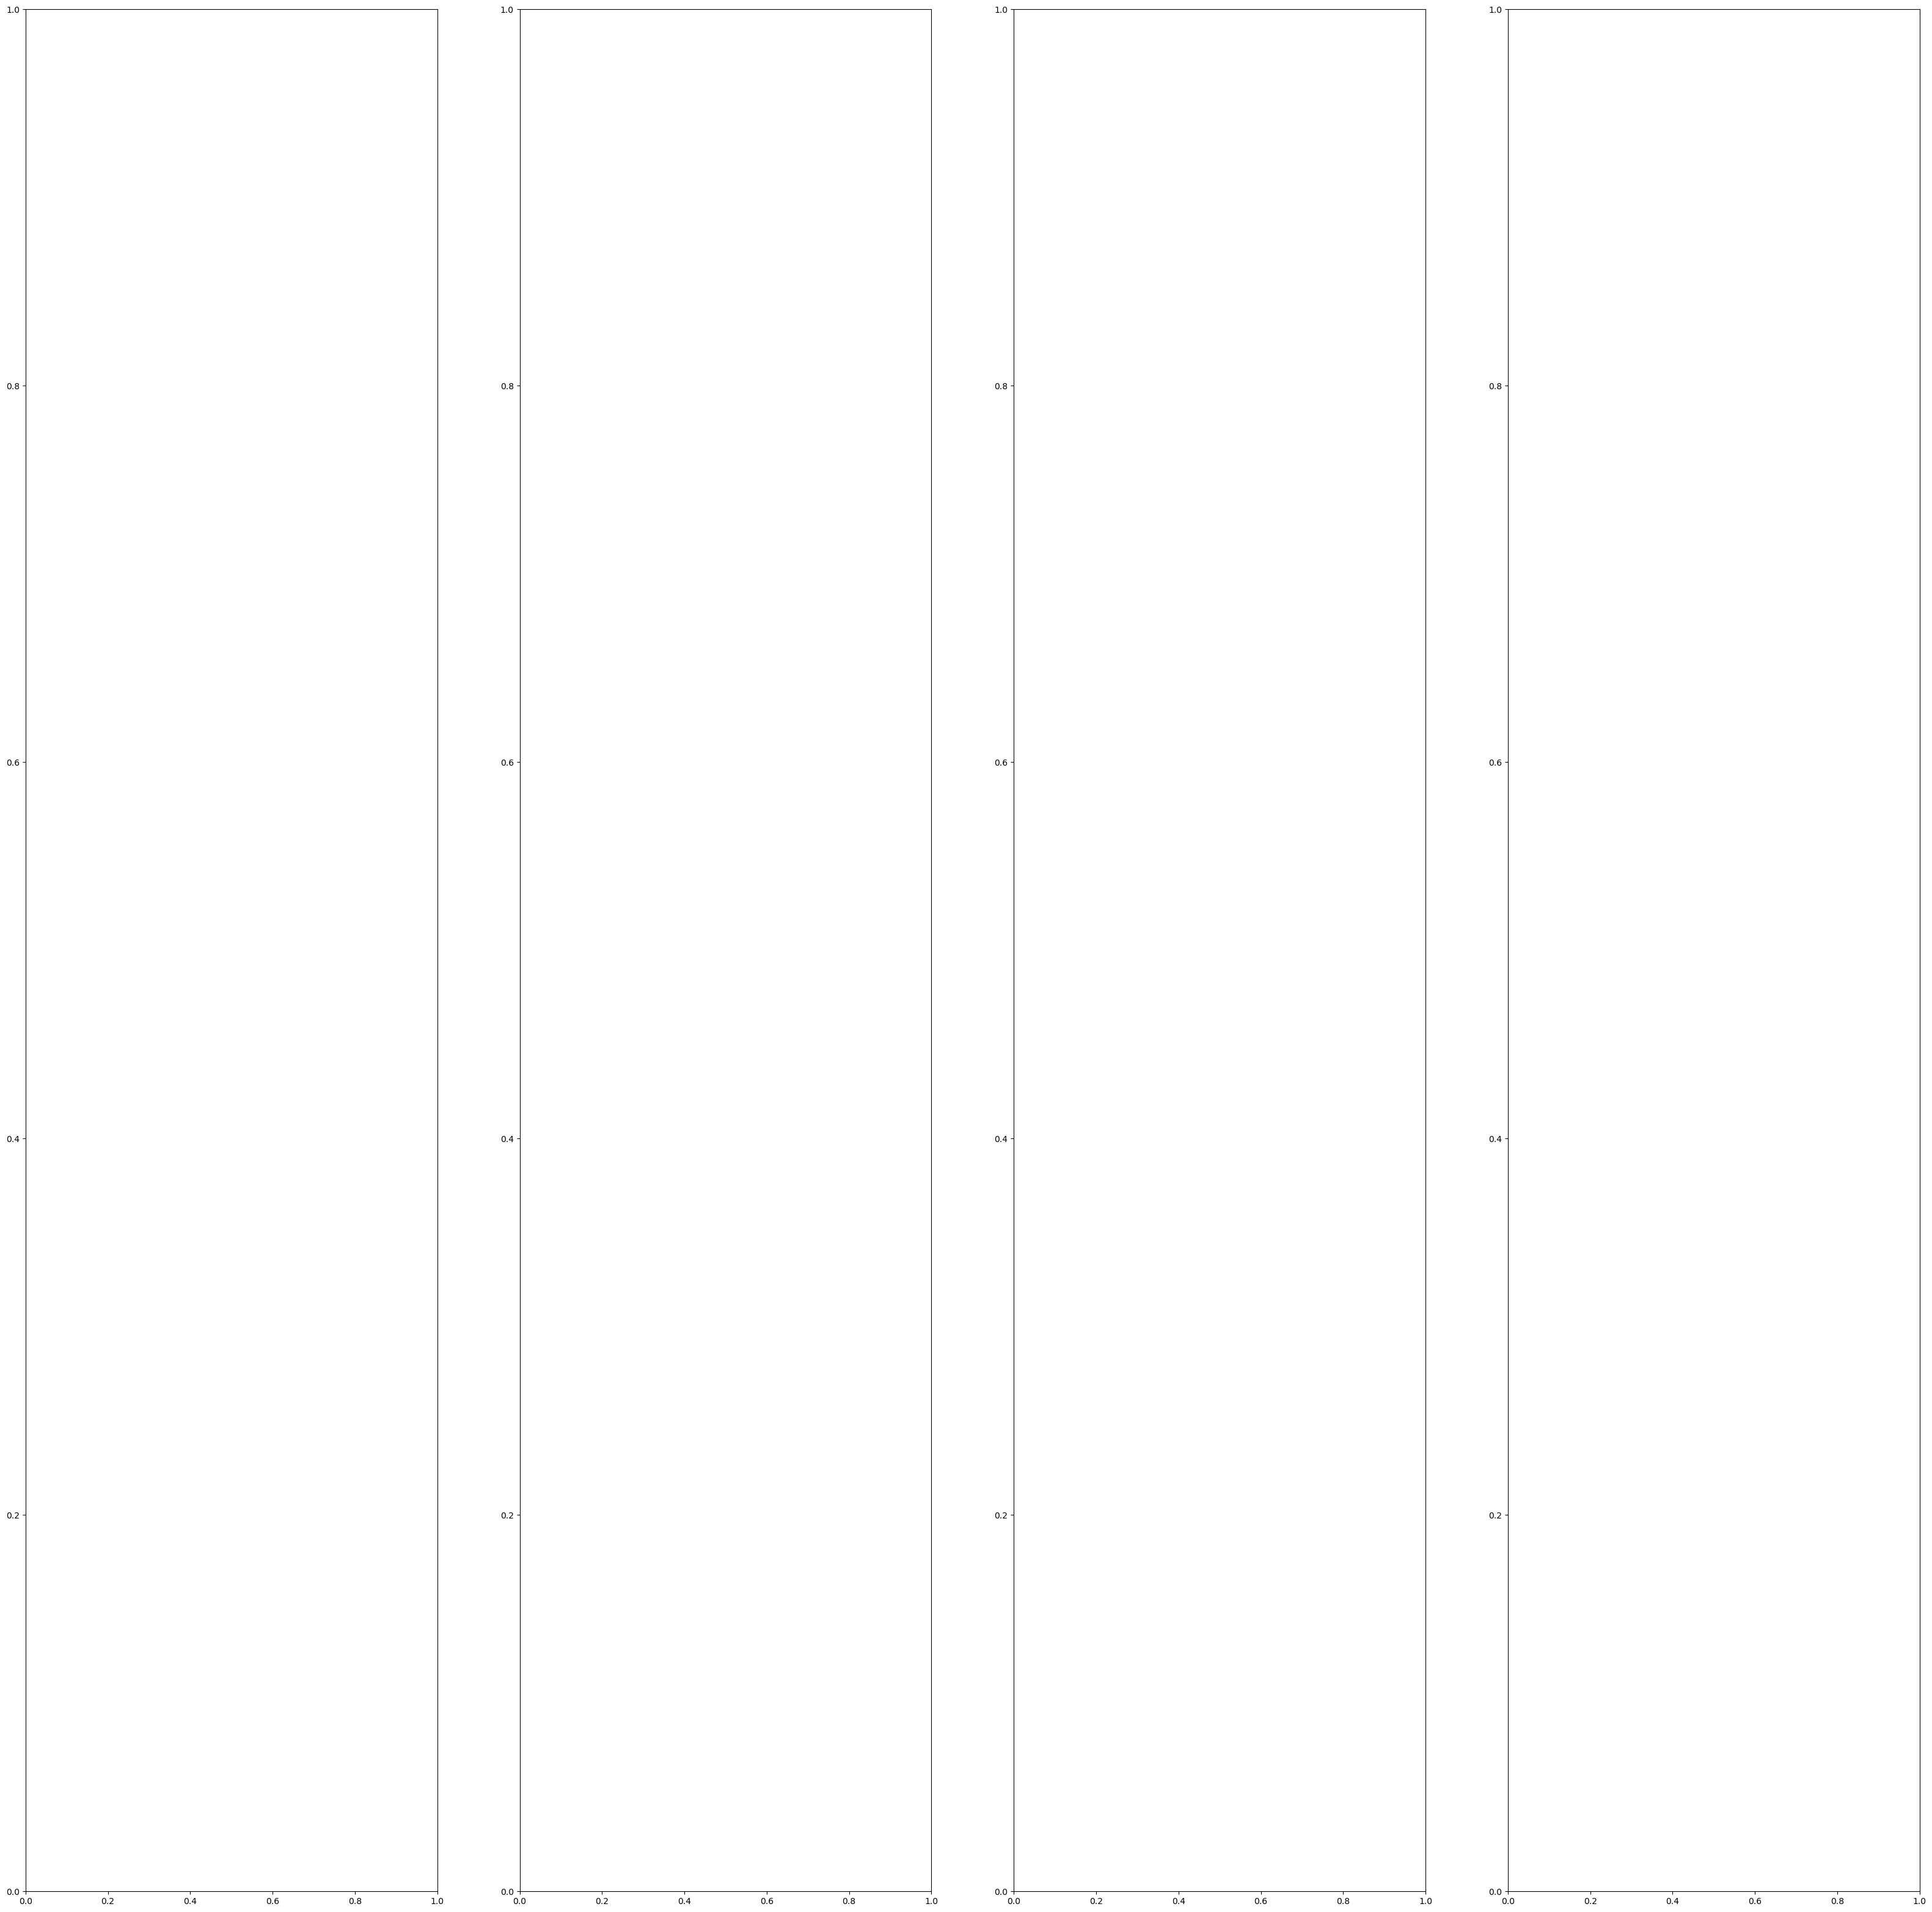

In [101]:
fig, ax = plt.subplots(ncols=4, figsize=(40, 40))
for idx in range(4):
    # Extract image and coordinates for the current index
    sample_image = res[0][idx].copy()
    sample_coords = res[1][idx]  # Check if this resolves the indexing issue

    # Adjust for correct scaling if image size differs
    height, width = sample_image.shape[:2]  # Get image dimensions
    top_left = tuple(np.multiply(sample_coords[:2], [width, height]).astype(int))
    bottom_right = tuple(np.multiply(sample_coords[2:], [width, height]).astype(int))

    # Draw bounding box on the image
    cv.rectangle(sample_image, top_left, bottom_right, (255, 0, 0), 2)
    
    # Display the image
    ax[idx].imshow(sample_image)

plt.show()
